# <center>Evaluation of Learning Assistants in the Introductory Physics Classroom</center>

## <center>By Alexander Knight</center>

This project was to determine the effectiveness of Learning Assistants with the education of students in the PHY-121 Introductory Physics I and PHY-123 Introductory Physics II classes during the school year of 2015-2016. The 2014-2015 school year was evaluated as a comparison.

The following cell imports the required tools and settings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',500)
%matplotlib inline

The following code was used to read in, crop, anonymize, and randomize the grades from the two school years.

```python
#import grades from .csv files
fall2014 = pd.read_csv('PHY121F2014.csv')
spring2015 = pd.read_csv('PHY123Sp2015.csv')
fall2015= pd.read_csv('Phy121F2015.csv')
spring2016 = pd.read_csv('PHY123Sp2016.csv')

#crops empty/unnecessary rows and columns from each set of dataframes
fall2014 = fall2014.drop(fall2014.columns[[16,17,18,19,20]], axis=1)
fall2014 = fall2014.drop('ID', axis=1)
fall2014 = fall2014.drop(fall2014.index[90:])

spring2015 = spring2015.drop(spring2015.columns[15:], axis=1)
spring2015 = spring2015.drop('ID', axis=1)
spring2015 = spring2015.drop(spring2015.index[46:])

fall2015 = fall2015.drop('Converted?', axis=1)
fall2015 = fall2015.drop(fall2015.index[70:])

spring2016 = spring2016.drop(spring2016.index[-1])


#Merges together semesters into school year, by name
year14_15 = pd.merge(fall2014, spring2015, on='Name', how='outer')
year15_16 = pd.merge(fall2015, spring2016, on='Name', how='outer')

#crops out unnecessary column
year14_15 = year14_15.drop('Major_y', axis=1)

#removes names from dataframes
year14_15 = year14_15.drop('Name', axis=1)
year15_16 = year15_16.drop('Name', axis=1)


#randomly sorts the rows
year14_15 = year14_15.iloc[np.random.permutation(len(year14_15))]
year15_16 = year15_16.iloc[np.random.permutation(len(year15_16))]

#resets the index
year14_15 = year14_15.reset_index(drop=True)
year15_16 = year15_16.reset_index(drop=True)

year14_15.to_csv('Fall2014_Spring2015_data.csv')
year15_16.to_csv('Fall2015_Spring2015_data.csv')
```

In order to preserve the privacy of the students, the anonymous data was saved seperately and is imported below for analysis.

In [3]:
year14_15 = pd.read_csv('Fall2014_Spring2015_data.csv')
year15_16 = pd.read_csv('Fall2015_Spring2015_data.csv')

## Semester Grade Analysis

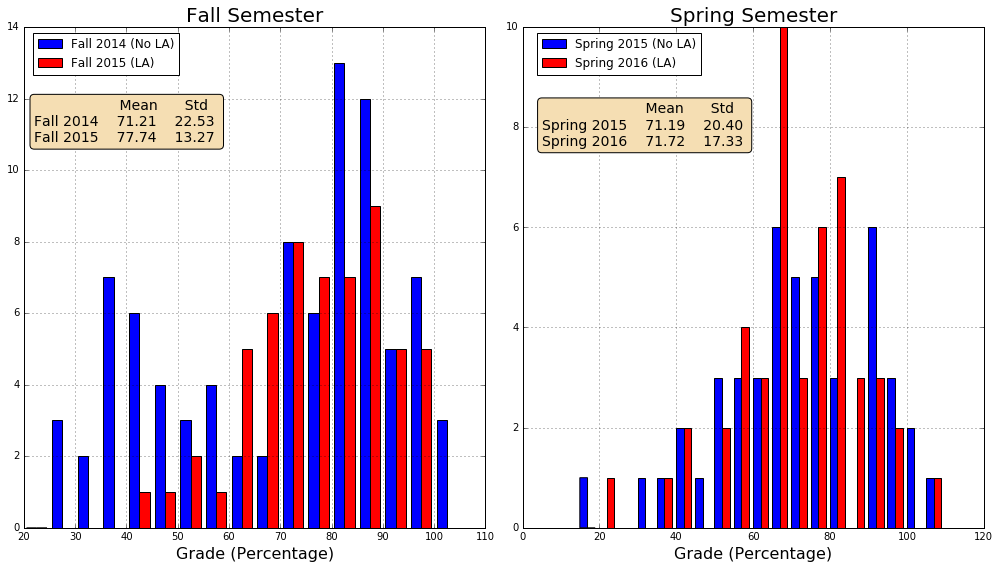

In [9]:
fall14_15 = (year14_15.Total_Points_f.dropna()/1000.0)*100
fall15_16 = (year15_16.Total_Points_f.dropna()/1000.0)*100
falldata = '                   Mean      Std\nFall 2014    {0:0.2f}    {1:0.2f} \nFall 2015    {2:0.2f}    {3:0.2f}'.format(fall14_15.mean(), fall14_15.std(),
                                                                                                         fall15_16.mean(), fall15_16.std())

spring14_15 = (year14_15.Total_Points_s.dropna()/1000.0)*100
spring15_16 = (year15_16.Total_Points_s.dropna()/1000.0)*100
springdata = '                       Mean      Std\nSpring 2015    {0:0.2f}    {1:0.2f} \nSpring 2016    {2:0.2f}    {3:0.2f}'.format(spring14_15.mean(), spring14_15.std(),
                                                                                                         spring15_16.mean(), spring15_16.std())
props = dict(boxstyle='round', facecolor='wheat')

fig = plt.figure(figsize=(14,8))
plt.subplot(121)
plt.hist((fall14_15, fall15_16), 
         bins=np.arange((min(min(fall14_15),min(fall15_16))//10)*10,
                        (max(max(fall14_15),max(fall15_16))+5)//10*10, 5),
        label=['Fall 2014 (No LA)', 'Fall 2015 (LA)'], color=['blue','red'])
plt.grid()
plt.title('Fall Semester', fontsize=20)
plt.text(22,12,falldata, fontsize=14, verticalalignment='top', bbox=props)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.legend(bbox_to_anchor=(0.35,1))

plt.subplot(122)
plt.hist((spring14_15, spring15_16),
        bins = np.arange((min(min(spring14_15),min(spring15_16))/10)*10,
                        (max(max(spring14_15),max(spring15_16))+5)//10*10,5),
        label=['Spring 2015 (No LA)', 'Spring 2016 (LA)'], color=['blue','red'])
plt.grid()
plt.title('Spring Semester', fontsize=20)
plt.text(5,8.5,springdata, fontsize=14, verticalalignment='top', bbox=props)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.legend(bbox_to_anchor=(0.4,1))

plt.tight_layout()
plt.show()


The above histograms displays the total final grade for the fall and spring semesters. The 2014-2015 school year is displayed in blue, while the 2015-2016 is displayed in red.

For the fall 2014 semester, there is a clear bimodal distrobution, with maxima around 38 and 85. The fall 2015 semester distrobution is more regular. This resulted in a slight increase in the mean grade, and a large decrease in the standard deviation.

The spring semesters are both normal, but the mean only increased a fraction of a point from 2015 to 2016. The was still a decent decrease in the standard deviation.

The lack of a solid increase in the mean of the spring semesters could be from just that class. For a proper analysis, more classes both from semesters with and without learning assistants is required.

## Exam Analysis

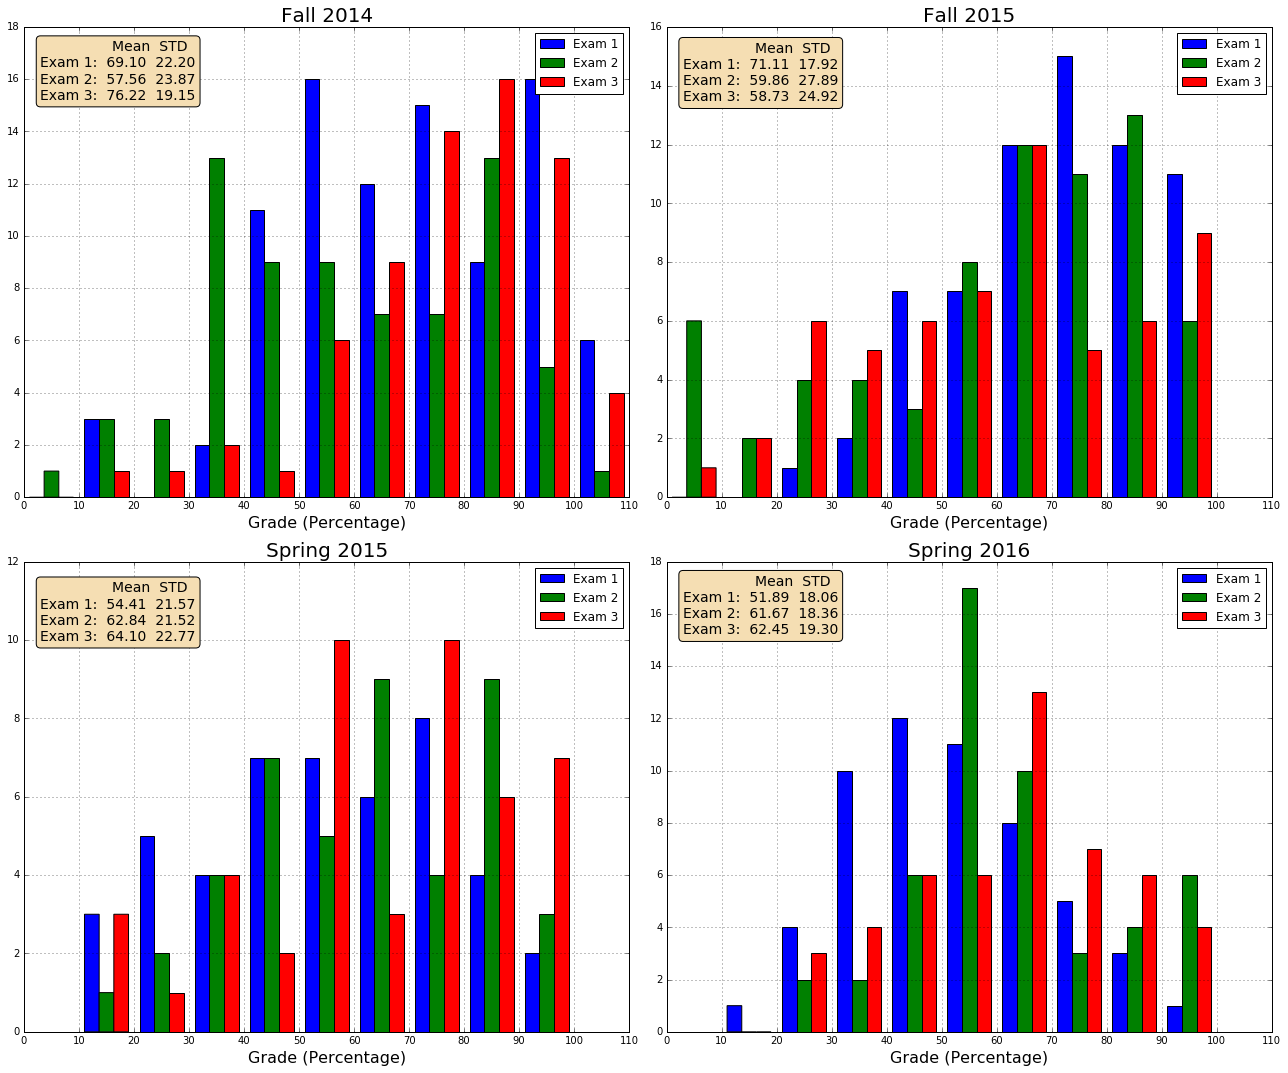

In [28]:
exam1_14_15_f = (year14_15.Exam_1_Scaled_f.dropna()/200)*100
exam2_14_15_f = (year14_15.Exam_2_Scaled_f.dropna()/200)*100
exam3_14_15_f = (year14_15.Exam_3_Scaled_f.dropna()/200)*100

exam2_14_15_f = exam2_14_15_f[exam2_14_15_f > 0.0]
exam3_14_15_f = exam3_14_15_f[exam3_14_15_f > 0.0]
fall14_15data = '                Mean  STD\nExam 1:  {0:.2f}  {1:.2f}\nExam 2:  {2:.2f}  {3:.2f}\nExam 3:  {4:.2f}  {5:.2f}'.format(exam1_14_15_f.mean(),exam1_14_15_f.std(),
                                                                                              exam2_14_15_f.mean(),exam2_14_15_f.std(),
                                                                                              exam3_14_15_f.mean(),exam3_14_15_f.std())

exam1_15_16_f = (year15_16.Exam_1_f.dropna()/200)*100
exam2_15_16_f = (year15_16.Exam_2_AVE_f.dropna()/200)*100
exam3_15_16_f = (year15_16.Exam_3_f.dropna()/200)*100
fall15_16data = '                Mean  STD\nExam 1:  {0:.2f}  {1:.2f}\nExam 2:  {2:.2f}  {3:.2f}\nExam 3:  {4:.2f}  {5:.2f}'.format(exam1_15_16_f.mean(),exam1_15_16_f.std(),
                                                                                              exam2_15_16_f.mean(),exam2_15_16_f.std(),
                                                                                              exam3_15_16_f.mean(),exam3_15_16_f.std())

exam1_14_15_s = (year14_15.Exam_1_s.dropna()/250)*100
exam2_14_15_s = (year14_15.Exam_2_s.dropna()/250)*100
exam3_14_15_s = (year14_15.Exam_3_Scaled_s.dropna()/250)*100
spring14_15data = '                Mean  STD\nExam 1:  {0:.2f}  {1:.2f}\nExam 2:  {2:.2f}  {3:.2f}\nExam 3:  {4:.2f}  {5:.2f}'.format(exam1_14_15_s.mean(),exam1_14_15_s.std(),
                                                                                              exam2_14_15_s.mean(),exam2_14_15_s.std(),
                                                                                              exam3_14_15_s.mean(),exam3_14_15_s.std())

exam1_15_16_s = (year15_16.Exam_1_s.dropna()/250)*100
exam2_15_16_s = (year15_16.Exam_2_s.dropna()/250)*100
exam3_15_16_s = (year15_16.Exam_3_Scaled_s.dropna()/300)*100
spring15_16data = '                Mean  STD\nExam 1:  {0:.2f}  {1:.2f}\nExam 2:  {2:.2f}  {3:.2f}\nExam 3:  {4:.2f}  {5:.2f}'.format(exam1_15_16_s.mean(),exam1_15_16_s.std(),
                                                                                              exam2_15_16_s.mean(),exam2_15_16_s.std(),
                                                                                              exam3_15_16_s.mean(),exam3_15_16_s.std())

props = dict(boxstyle='round', facecolor='wheat')

plt.figure(figsize=(18,15))
plt.subplot(221)
plt.hist((exam1_14_15_f,exam2_14_15_f,exam3_14_15_f), 
         bins=np.arange(min(min(exam1_14_15_f),min(exam2_14_15_f),min(exam3_14_15_f))//10*10,
                        (max(max(exam1_14_15_f),max(exam2_14_15_f),max(exam3_14_15_f))//10)*10+5,10),
        label=['Exam 1', 'Exam 2', 'Exam 3'])
plt.grid()
plt.title('Fall 2014', fontsize=20)
plt.text(3,17.5,fall14_15data, fontsize=14, verticalalignment='top', bbox=props)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.xticks(np.arange(0.0, 130.0, 10))
plt.xlim(0.0,110.0)
plt.ylim(0,18)
plt.legend()



plt.subplot(222)
plt.hist((exam1_15_16_f, exam2_15_16_f, exam3_15_16_f), 
         bins = np.arange(min(min(exam1_15_16_f),min(exam2_15_16_f), min(exam3_15_16_f))//10*10, 
                          max(max(exam1_15_16_f),max(exam2_15_16_f),max(exam3_15_16_f))//10*10+5,10),
        label=['Exam 1', 'Exam 2', 'Exam 3'])
plt.grid()
plt.title('Fall 2015', fontsize=20)
plt.text(3,15.5,fall15_16data, fontsize=14, verticalalignment='top', bbox=props)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.xticks(np.arange(0.0, 130.0, 10))
plt.xlim(0.0,110.0)

plt.legend()


plt.subplot(223)
plt.hist((exam1_14_15_s,exam2_14_15_s,exam3_14_15_s), 
         bins=np.arange(min(min(exam1_14_15_s),min(exam2_14_15_s),min(exam3_14_15_s))//10*10,
                        (max(max(exam1_14_15_s),max(exam2_14_15_s),max(exam3_14_15_s))//10)*10+5,10),
        label=['Exam 1', 'Exam 2', 'Exam 3'])
plt.grid()
plt.title('Spring 2015', fontsize=20)
plt.text(3,11.5,spring14_15data, fontsize=14, verticalalignment='top', bbox=props)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.xticks(np.arange(0.0, 130.0, 10))
plt.xlim(0.0,110.0)
plt.ylim(0,12)
plt.legend()


plt.subplot(224)
plt.hist((exam1_15_16_s, exam2_15_16_s, exam3_15_16_s), 
         bins = np.arange(min(min(exam1_15_16_s),min(exam2_15_16_s), min(exam3_15_16_s))//10*10, 
                          max(max(exam1_15_16_s),max(exam2_15_16_s),max(exam3_15_16_s))//10*10+5,10),
        label=['Exam 1', 'Exam 2', 'Exam 3'])
plt.grid()
plt.title('Spring 2016', fontsize=20)
plt.xlabel('Grade (Percentage)', fontsize=16)
plt.legend()
plt.xticks(np.arange(0.0, 130.0, 10))
plt.xlim(0.0,110.0)
plt.text(3,17.5,spring15_16data, fontsize=14, verticalalignment='top', bbox=props)


plt.tight_layout()
plt.show()


From the above histograms, the mean for the fall semester increased on the first two tests, but decreased in all other tests for both semesters. In every case, the standard deviation decreased.

From this, we can determine that the learning assistants were most useful to the bottom quartile of the class, bringing the lower scoring students up. We theorize that the upper quartile students found the lecture the most useful, and as such did not benefit as much by the group sessions led by the learning assistants. 

Concerning the reduced mean for most of the exams, there have been fluxuations in the mean exam grade from year to year. This past year may have simply been on the low end of the distrobution. It may have been due to the learning assistants, or classroom structure as well. It may have been due to multiple smaller sources. With only two years, we are relying on a two point calibration. To understand the true impact of the learning assitants in the classroom, more data is required from years both with and without learning assistants.